In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [8]:
urls=['http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start='+str(i*10)+'1&view=simple' for i in range(11)]

In [10]:
for url in urls:
    print url

http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=01&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=101&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=201&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=301&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=401&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=501&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=601&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=701&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=801&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=901&view=simple
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=1001&view=simple


In [1]:
http://www.imdb.com/search/title?groups=top_1000&sort=user_rating&start=101&view=simple

SyntaxError: invalid syntax (<ipython-input-1-d41a4e5d35c3>, line 1)

In [25]:
 data_files=[]
for url in urls:
    response = requests.get(url)
    page = response.text

    soup = BeautifulSoup(page, 'html.parser')
   
    for link in soup.findAll('a'):
        link=(link.get('href'))
#         print link
        dataset=re.findall('/title/tt[0-9]*/', str(link))
        if dataset!=[]:
            data_files.append('http://www.imdb.com'+dataset[0])
            print 'http://www.imdb.com'+dataset[0]
    s=set(data_files)

http://www.imdb.com/title/tt0111161/
http://www.imdb.com/title/tt0068646/
http://www.imdb.com/title/tt0071562/
http://www.imdb.com/title/tt0468569/
http://www.imdb.com/title/tt0050083/
http://www.imdb.com/title/tt0108052/
http://www.imdb.com/title/tt0167260/
http://www.imdb.com/title/tt0110912/
http://www.imdb.com/title/tt0060196/
http://www.imdb.com/title/tt0137523/
http://www.imdb.com/title/tt0120737/
http://www.imdb.com/title/tt1375666/
http://www.imdb.com/title/tt0109830/
http://www.imdb.com/title/tt0080684/
http://www.imdb.com/title/tt0167261/
http://www.imdb.com/title/tt0073486/
http://www.imdb.com/title/tt0099685/
http://www.imdb.com/title/tt0047478/
http://www.imdb.com/title/tt0133093/
http://www.imdb.com/title/tt0076759/
http://www.imdb.com/title/tt0317248/
http://www.imdb.com/title/tt0114369/
http://www.imdb.com/title/tt0038650/
http://www.imdb.com/title/tt0118799/
http://www.imdb.com/title/tt0114814/
http://www.imdb.com/title/tt0102926/
http://www.imdb.com/title/tt0816692/
h

In [26]:
len(s)

1000

In [27]:
master_movie_dict={}
for unique_movie_url in s:
    url = unique_movie_url
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'html.parser')
    movie1_dict={}
    movie_title=soup.find('title').string[:-13].strip() #Extract Title
    movie1_dict['Year']=soup.find('title').string[-12:-8] #Extract Year
    movie1_dict['IMDB Rating']=float(soup.find('span', itemprop="ratingValue").string) #Extract imdb rating
    movie1_dict['Genre']=soup.find('span', itemprop="genre").string #Extract genre
    movie1_dict['Rating Value']=float(soup.find('span', itemprop="ratingValue").string) #Extract imdb rating
    movie1_dict['Rating Count']=float(soup.find('span', itemprop="ratingCount").string.replace(",",""))
    full_list_attribute=[]
    for i in soup.findAll('a', href=re.compile('/country.*')): #Extract Countries
        full_list_attribute.append(i.string)
    movie1_dict['Country']=full_list_attribute
    try:
        movie1_dict['Duration']=soup.find('time').string.strip() #Returns duration of movie as unicode string formatted as _h _min
    except:
        continue
    for i in soup('h4'):
        if i.string=="Gross:":
            movie1_dict['Gross']=i.nextSibling.strip().replace("$","").replace(",","")
        if i.string=="Budget:":
            movie1_dict['Budget']=i.nextSibling.strip().replace("$","").replace(",","")
        if i.string=="Opening Weekend:":
             movie1_dict['Opening Weekend Gross']=unicode(i.nextSibling).strip().replace("$","").replace(",","").split()[0] #Opening Weekend GrossProbably a little too brute force
    try:
        movie1_dict['Language']=soup.find('a', href=re.compile('/language.*')).string
    except:
        continue
    master_movie_dict[movie_title]=movie1_dict
movie_dataframe=pd.DataFrame.from_dict(master_movie_dict).transpose()

In [30]:
cd Cult_Classic_CSVs/

/Users/matthewmitchell/Desktop/ipynb_checkpoints/Cult_Classic_CSVs


In [31]:
movie_dataframe.to_csv('IMDB_Top_Thousand.csv', encoding='utf-8')

In [32]:
movie_dataframe[movie_dataframe.Budget.str.isdigit()==False]


,Budget,Country,Duration,Genre,Gross,IMDB Rating,Language,Opening Weekend Gross,Rating Count,Rating Value,Year
3 Idiots,INR 550000000,[India],2h 50min,Comedy,6523137,8.4,Hindi,£437554,204505,8.4,2009
"4 Months, 3 Weeks and 2 Days",€590000,"[Romania, Belgium]",1h 53min,Drama,1185783,7.9,Romanian,51712,44583,7.9,2007
A Christmas Story,CAD 4000000,"[USA, Canada]",1h 34min,Comedy,NaN,8.1,English,NaN,104704,8.1,1983
A Prophet,€12000000,"[France, Italy]",2h 35min,Crime,2084637,7.9,French,£312237,77958,7.9,2009
Akira,JPY 1100000000,[Japan],2h 4min,Animation,439162,8.1,Japanese,NaN,105440,8.1,1988
Amélie,FRF 77000000,"[France, Germany]",2h 2min,Comedy,33201661,8.4,French,496031,530569,8.4,2001
Barfi!,INR 300000000,[India],2h 31min,Adventure,2804874,8.2,Hindi,1061713,52814,8.2,2012
Breathless,FRF 400000,[France],1h 30min,Crime,336705,8,French,£25164,51628,8,1960
Brief Encounter,£170000,[UK],1h 26min,Drama,NaN,8.1,English,NaN,25994,8.1,1945
C.R.A.Z.Y.,CAD 6500000,[Canada],2h 7min,Comedy,NaN,8,French,NaN,27118,8,2005


In [46]:
movie_dataframe.describe()

,Year,Rating_Value,Rating_Count,Log_Rating_Count
count,996.000000,996.000000,996.000000,996.000000
mean,1990.994980,7.911044,204182.904618,11.701712
std,20.960527,0.308959,231594.380658,1.022369
min,1920.000000,7.500000,25008.000000,10.126951
25%,1979.750000,7.700000,49785.000000,10.815469
50%,1998.000000,7.900000,106842.500000,11.579110
75%,2007.000000,8.100000,273954.500000,12.520717
max,2016.000000,9.300000,1677575.000000,14.332860


In [35]:
movie_dataframe['Rating_Value']=movie_dataframe['Rating Value']

In [36]:
movie_dataframe['Rating_Count']=movie_dataframe['Rating Count']

In [42]:
movie_dataframe.Year=movie_dataframe.Year.astype(float)

In [45]:
movie_dataframe['Log_Rating_Count']=np.log(movie_dataframe.Rating_Count)

In [48]:
y, x = dmatrices('Rating_Value ~ + Log_Rating_Count + Year', movie_dataframe, return_type='dataframe')
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Rating_Value   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     182.7
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           2.78e-68
Time:                        16:33:48   Log-Likelihood:                -86.891
No. Observations:                 996   AIC:                             179.8
Df Residuals:                     993   BIC:                             194.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           17.2222      0.809     21.300      0.000        15.635    18.809
Log_Rating_Count     0.1458      0.009     17.021      0.000         0.129     0.163
Year                -0.0055      0.000    -13.245      0.000        -0.006    -0.005
==============================================================================
Omnibus:                       41.963   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.188
Skew:                           0.515   Prob(JB):                     9.34e-11
Kurtosis:                       3.224   Cond. No.                     1.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
has_budget=movie_dataframe[movie_dataframe.Budget.str.isdigit()==True]

In [53]:
has_budget['Budget']=has_budget.Budget.astype(float)

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
has_budget

,Budget,Country,Duration,Genre,Gross,IMDB Rating,Language,Opening Weekend Gross,Rating Count,Rating Value,Year,Rating_Value,Rating_Count,Log_Rating_Count,Log_Budget
(500) Days of Summer,7500000,[USA],1h 35min,Comedy,32391374,7.7,English,834501,374203,7.7,2009,7.7,374203,12.832554,15.830414
12 Angry Men,350000,[USA],1h 36min,Crime,NaN,8.9,English,NaN,443739,8.9,1957,8.9,443739,13.002992,12.765688
12 Years a Slave,20000000,"[USA, UK]",2h 14min,Biography,56667870,8.1,English,923715,434705,8.1,2013,8.1,434705,12.982423,16.811243
127 Hours,18000000,"[USA, UK]",1h 34min,Adventure,18329466,7.6,English,264851,277504,7.6,2010,7.6,277504,12.533591,16.705882
2001: A Space Odyssey,12000000,"[UK, USA]",2h 29min,Adventure,56715371,8.3,English,NaN,423990,8.3,1968,8.3,423990,12.957465,16.300417
21 Grams,20000000,[USA],2h 4min,Drama,16248701,7.7,English,274454,188881,7.7,2003,7.7,188881,12.148872,16.811243
25th Hour,15000000,[USA],2h 15min,Drama,13060843,7.7,English,108865,149060,7.7,2002,7.7,149060,11.912104,16.523561
28 Days Later...,8000000,[UK],1h 53min,Drama,45063889,7.6,English,£1500079,295341,7.6,2002,7.6,295341,12.595886,15.894952
3-Iron,1000000,"[South Korea, Japan]",1h 28min,Crime,238507,8.1,Korean,20084,38417,8.1,2004,8.1,38417,10.556255,13.815511
300,65000000,[USA],1h 57min,Action,210592590,7.7,English,70885301,604428,7.7,2006,7.7,604428,13.312038,17.989898


In [61]:
y, x = dmatrices('Rating_Value ~ Log_Budget + Log_Rating_Count + Year', has_budget, return_type='dataframe')
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Rating_Value   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     153.6
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           6.00e-78
Time:                        16:50:38   Log-Likelihood:                -40.829
No. Observations:                 771   AIC:                             89.66
Df Residuals:                     767   BIC:                             108.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           16.1419      1.101     14.667      0.000        13.981    18.302
Log_Budget          -0.0462      0.008     -5.698      0.000        -0.062    -0.030
Log_Rating_Count     0.2166      0.011     19.789      0.000         0.195     0.238
Year                -0.0051      0.001     -8.545      0.000        -0.006    -0.004
==============================================================================
Omnibus:                       39.201   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.436
Skew:                           0.524   Prob(JB):                     1.36e-10
Kurtosis:                       3.562   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x29d52b890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2a02da710>]], dtype=object)

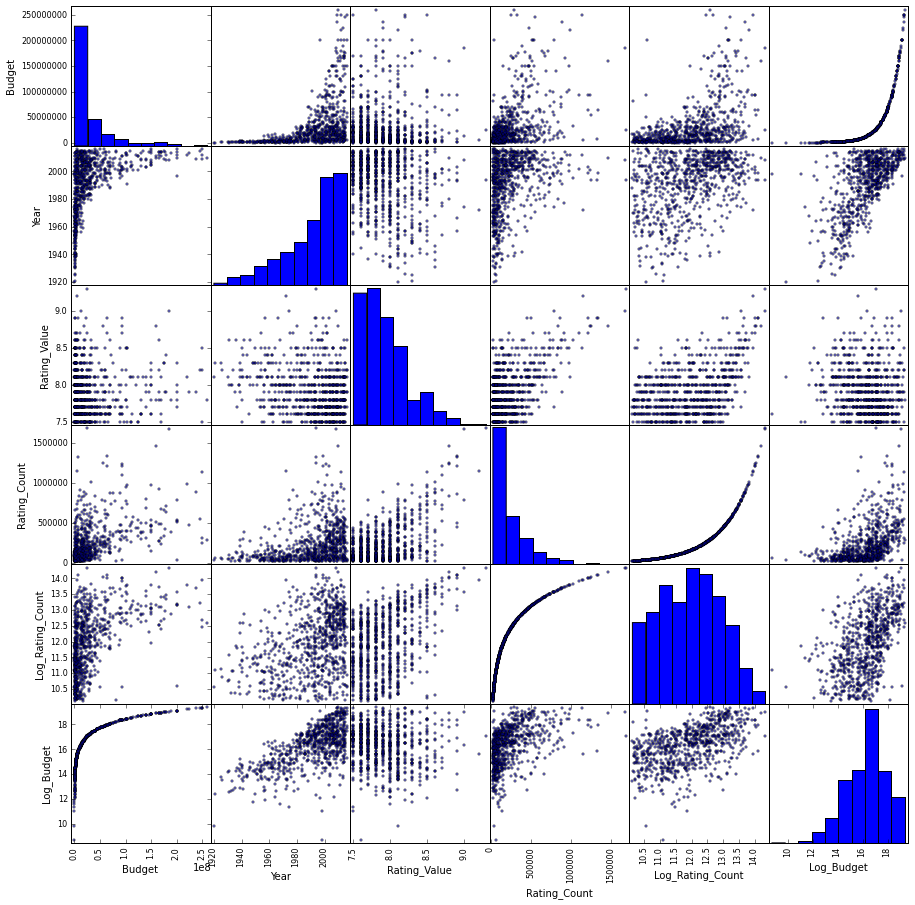

In [62]:
%matplotlib inline
pd.tools.plotting.scatter_matrix(has_budget, figsize=(15,15))